# Chapter 6: How to clean the data

In [1]:
import pandas as pd

## What the info() method can tell you

In [30]:
#if running in Colab change file to https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/president_polls_2016.csv
polls = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/president_polls_2016.csv')

In [3]:
polls.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


In [4]:
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
cycle               12624 non-null int64
branch              12624 non-null object
type                12624 non-null object
matchup             12624 non-null object
forecastdate        12624 non-null object
state               12624 non-null object
startdate           12624 non-null object
enddate             12624 non-null object
pollster            12624 non-null object
grade               11337 non-null object
samplesize          12621 non-null float64
population          12624 non-null object
poll_wt             12624 non-null float64
rawpoll_clinton     12624 non-null float64
rawpoll_trump       12624 non-null float64
rawpoll_johnson     8397 non-null float64
rawpoll_mcmullin    90 non-null float64
adjpoll_clinton     12624 non-null float64
adjpoll_trump       12624 non-null float64
adjpoll_johnson     8397 non-null float64
adjpoll_mcmullin    90 non-null float64
multiver

In [ ]:
# DO NOT RUN UNLESS WORKING IN COLAB
# NOTE: This may take a long time to run as the jobs file is very large
# Step 1:
# to run in Colab download the following to your local drive
# download and extract https://www.bls.gov/oes/special.requests/oesm18all.zip
# Step 2:
# upload the file to cloud colab
from google.colab import files
files.upload()
# pick file oesm18all.zip


In [ ]:
# DO NOT RUN UNLESS WORKING IN COLAB
# run only after uploading file to Colab cloud
jobs = pd.read_excel('all_data_M_2018.xlsx')

In [ ]:
# run only if running in local jupyter notebook and loading from local drive
jobs = pd.read_excel('../../data/oesm18all/all_data_M_2018.xlsx')

In [ ]:
jobs.head()

## What the unique values can tell you

In [5]:
polls.nunique()

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  10
samplesize           1766
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       584
rawpoll_mcmullin       16
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6629
adjpoll_mcmullin       57
multiversions           1
url                  1304
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

## What the value counts can tell you

In [7]:
polls.state.value_counts().head(4)

U.S.              3318
Florida            444
North Carolina     375
Pennsylvania       375
Name: state, dtype: int64

In [8]:
polls.state.value_counts(normalize=True).head(4)

U.S.              0.262833
Florida           0.035171
North Carolina    0.029705
Pennsylvania      0.029705
Name: state, dtype: float64

In [9]:
polls.multiversions.value_counts(dropna=False)

NaN    12588
*         36
Name: multiversions, dtype: int64

## How to drop rows

In [ ]:
#polls = polls[polls.type == 'now-cast']

In [32]:
# drops by reassigning polls to just include polls with type equal to now cast
polls = polls.query('type == "now-cast"')

In [33]:
polls.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,2016,President,now-cast,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,2016,President,now-cast,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,2016,President,now-cast,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,2016,President,now-cast,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,2016,President,now-cast,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016


### If working in colab just review the code that references fires

In [22]:
import sqlite3
fires_con = sqlite3.connect('FPA_FOD_20170508.sqlite')
fires = pd.read_sql_query(
    '''SELECT STATE, FIRE_YEAR, DATETIME(DISCOVERY_DATE) AS DISCOVERY_DATE,
              FIRE_NAME, FIRE_SIZE, LATITUDE, LONGITUDE
       FROM Fires''', fires_con)
fires.columns = fires.columns.str.lower()

In [23]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 7 columns):
state             object
fire_year         int64
discovery_date    object
fire_name         object
fire_size         float64
latitude          float64
longitude         float64
dtypes: float64(3), int64(1), object(3)
memory usage: 100.4+ MB


In [19]:
# shows duplicates
# parameters subset lists columns for identifying duplicates
# parameters keep -- first is default, marks all as dups but not first
# parameteres keep -- last -- marks all as dups except last
# keep = false all duplicates marked as true
fires[fires.duplicated(keep=False)]

,state,fire_year,discovery_date,fire_name,fire_size,latitude,longitude
48642,CA,1992,1992-06-28 00:00:00,None,0.10,36.021667,-118.805000
48644,CA,1992,1992-06-28 00:00:00,None,0.10,36.021667,-118.805000
71593,WA,1994,1994-08-06 00:00:00,None,0.10,46.441667,-121.783333
189841,WA,1992,1992-09-06 00:00:00,None,0.10,47.908200,-117.992700
193186,MT,1992,1992-08-14 00:00:00,None,2.00,45.083300,-107.534000
898440,OK,2001,2001-03-10 00:00:00,None,5.00,36.328900,-94.943600
898441,OK,2001,2001-03-10 00:00:00,None,5.00,36.328900,-94.943600
1065456,WA,1992,1992-09-06 00:00:00,None,0.10,47.908200,-117.992700
1065498,MT,1992,1992-08-14 00:00:00,None,2.00,45.083300,-107.534000
1106751,CA,2007,2007-10-22 00:00:00,None,1.00,38.240000,-122.748889


In [24]:
fires.drop_duplicates(keep='first', inplace=True)

In [25]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878537 entries, 0 to 1880464
Data columns (total 7 columns):
state             object
fire_year         int64
discovery_date    object
fire_name         object
fire_size         float64
latitude          float64
longitude         float64
dtypes: float64(3), int64(1), object(3)
memory usage: 114.7+ MB


## How to drop columns

In [34]:
polls.nunique()

cycle                  1
branch                 1
type                   1
matchup                1
forecastdate           1
state                 57
startdate            352
enddate              345
pollster             196
grade                 10
samplesize          1766
population             4
poll_wt             3894
rawpoll_clinton     1312
rawpoll_trump       1385
rawpoll_johnson      584
rawpoll_mcmullin      16
adjpoll_clinton     4202
adjpoll_trump       4199
adjpoll_johnson     2210
adjpoll_mcmullin      30
multiversions          1
url                 1304
poll_id             4208
question_id         4208
createddate          222
timestamp              1
dtype: int64

In [27]:
# polls.drop(columns=['cycle','forecastdate'])
# this will assign the changed dataset to polls, doesn't really change in place
polls_dropped = polls.drop(columns=['cycle','forecastdate'])
polls_dropped.head()

,branch,type,matchup,state,startdate,enddate,pollster,grade,samplesize,population,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016


In [35]:
# this actually changes original dataframe 
polls.drop(columns=['cycle','forecastdate'], errors='raise', inplace=True)
polls.head()

,branch,type,matchup,state,startdate,enddate,pollster,grade,samplesize,population,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016


## How to rename columns

In [36]:
polls = polls.rename(columns={
    'rawpoll_clinton':'clinton_pct',
    'rawpoll_trump':'trump_pct'})

In [37]:
polls_names_dict = {'rawpoll_clinton':'clinton_pct',
                    'rawpoll_trump':'trump_pct'}
polls.rename(columns = polls_names_dict, inplace = True)

In [40]:
polls.columns = polls.columns.str.replace('_pct','')

In [41]:
polls.head()

,branch,type,matchup,state,startdate,enddate,pollster,grade,samplesize,population,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016


## How to find missing values

In [ ]:
#### for mortality replace the csv file name with the following if running in colab
# https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv

In [42]:
# mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')

In [43]:
mortality_data.head(5)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [44]:
# show columns 5 through 9
mortality_data.loc[5:9]

,Year,AgeGroup,DeathRate
5,1905.0,01-04 Years,1498.9
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [45]:
# prints missing count in entire data frame
missing_count = mortality_data.shape[0] - mortality_data.count()
print(missing_count)

Year         3
AgeGroup     0
DeathRate    4
dtype: int64


In [49]:
# displays all rows that have missing values
mortality_data[mortality_data.isnull().any(axis=1)]

,Year,AgeGroup,DeathRate
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [50]:
# displays all rows with missing values in DeathRate column
mortality_data[mortality_data.DeathRate.isnull()]

,Year,AgeGroup,DeathRate
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [51]:
# displays all rows in Death Rate that don't have missing values
mortality_data[mortality_data.DeathRate.notnull()]

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9
10,1910.0,01-04 Years,1397.3
11,1911.0,01-04 Years,1176.0
12,1912.0,01-04 Years,1094.1
13,1913.0,01-04 Years,1193.4


### How to drop rows with missing values

In [52]:
# drops all rows with missing value
mortality_data = mortality_data.dropna()
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [53]:
# drops rows with two or more NAs
mortality_data.dropna(thresh=2, inplace=True)

In [54]:
# only drops rows with NA in Death Rate
mortality_data.dropna(subset=['DeathRate'], inplace=True)

## How to fill missing values

In [55]:
mortality_data = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [56]:
# replaces NAs in a column with mean
mortality_data.DeathRate.fillna(value=mortality_data.DeathRate.mean(), inplace=True)
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.800000
1,NaN,01-04 Years,1695.000000
2,1902.0,01-04 Years,181.221186
3,1903.0,01-04 Years,1542.100000


In [57]:
# forward fills NA values with a limit of 2 consecutive fills
mortality_data = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')
mortality_data.fillna(method = 'ffill', limit=2, inplace=True)
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,1900.0,01-04 Years,1695.0
2,1902.0,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1


In [58]:
# interpolate calculates new value by finding the midpoint between the cells before and after
mortality_data = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')
mortality_data = mortality_data.interpolate()
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.80
1,1901.0,01-04 Years,1695.00
2,1902.0,01-04 Years,1618.55
3,1903.0,01-04 Years,1542.10


## How to find date and number columns that are imported as objects

In [59]:
# selects all columns with specified data type
polls.select_dtypes('object').head(2)

,branch,type,matchup,state,startdate,enddate,pollster,grade,population,multiversions,url,createddate,timestamp
4208,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,lv,NaN,https://www.washingtonpost.com/news/the-fix/wp...,11/7/16,09:24:53 8 Nov 2016
4209,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,lv,NaN,https://datastudio.google.com/u/0/#/org//repor...,11/7/16,09:24:53 8 Nov 2016


## How to convert date and time strings to the datetime data type

In [60]:
date_cols = ['startdate','enddate','createddate','timestamp']
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11/3/2016,11/6/2016,11/7/16,09:24:53 8 Nov 2016
4209,11/1/2016,11/7/2016,11/7/16,09:24:53 8 Nov 2016


In [61]:
polls[date_cols] = polls[date_cols].apply(pd.to_datetime)
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:24:53
4209,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:24:53


In [62]:
polls['startdate'] = polls.startdate.dt.strftime("%m/%d/%Y")
polls['enddate'] = polls.enddate.dt.strftime("%m-%d-%y")
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11/03/2016,11-06-16,2016-11-07,2016-11-08 09:24:53
4209,11/01/2016,11-07-16,2016-11-07,2016-11-08 09:24:53


## How to convert object columns to numeric data types
## uses jobs - examine code only for reference

### if there is non-numeric data in a column this may raise an error
### setting errors ='coerce' will bypass the error

In [ ]:
# sample code with pandas and specified data frame
#
# pd.to_numeric(jobs.tot_emp, errors='coerce').tail(3)
#
# for non-numeric data it sets the data to NaN
# for numeric data it sets it to int or float64
# dtype changes from object with invalid data
# to dtype of float64 with NaN instead of string or invalid data

## How to work with the category data type

In [97]:
# converts object column to category type
# category data type consists of index numbers in a column
# that point to a table of text entries
# creates a table with each value appearing only once and an index value pointing to it
# saves considerable memory
fires.state = fires.state.astype('category')
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878537 entries, 0 to 1880464
Data columns (total 7 columns):
state             category
fire_year         int64
discovery_date    object
fire_name         object
fire_size         float64
latitude          float64
longitude         float64
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 102.1+ MB


In [85]:
fires.head()

,state,fire_year,discovery_date,fire_name,fire_size,latitude,longitude
0,CA,2005,2005-02-02 00:00:00,FOUNTAIN,0.10,40.036944,-121.005833
1,CA,2004,2004-05-12 00:00:00,PIGEON,0.25,38.933056,-120.404444
2,CA,2004,2004-05-31 00:00:00,SLACK,0.10,38.984167,-120.735556
3,CA,2004,2004-06-28 00:00:00,DEER,0.10,38.559167,-119.913333
4,CA,2004,2004-06-28 00:00:00,STEVENOT,0.10,38.559167,-119.933056


In [90]:
fires.state.value_counts()

CA    189516
GA    168693
TX    142017
NC    111277
FL     90261
SC     81290
NY     80395
MS     79230
AZ     71586
AL     66430
OR     61088
MN     44764
OK     43234
MT     40766
NM     37478
ID     36697
CO     34024
WA     33510
WI     31846
AR     31650
TN     31153
SD     30963
UT     30725
LA     30000
KY     27089
NJ     25839
WV     21964
VA     21816
PR     21506
MO     17934
NV     16956
ND     15201
WY     14166
ME     13145
AK     12843
MI     10495
HI      9892
PA      8712
NE      7973
KS      7673
CT      4892
IA      4128
MD      3621
OH      3479
MA      2578
NH      2446
IL      2325
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: state, dtype: int64

## See chapter 6 for more information on categories and replacing invalid values
#### pages 224 to 228 in Murach
#### example jobs.tot_emp.replace({'*':np.nan, '**':np.nan}, inplace=True)

## How to fix data type problems when you import the data

In [91]:
date_cols = ['forecastdate','startdate','enddate','createddate','timestamp']

In [92]:
polls = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/president_polls_2016.csv')
polls[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,11/8/16,11/3/2016,11/6/2016,11/7/16,09:35:33 8 Nov 2016
1,11/8/16,11/1/2016,11/7/2016,11/7/16,09:35:33 8 Nov 2016
2,11/8/16,11/2/2016,11/6/2016,11/8/16,09:35:33 8 Nov 2016


In [95]:
polls_new = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/president_polls_2016.csv', parse_dates=date_cols)
polls_new[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,2016-11-08,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:35:33
1,2016-11-08,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:35:33
2,2016-11-08,2016-11-02,2016-11-06,2016-11-08,2016-11-08 09:35:33


## How to find outliers

In [71]:
mortality_data = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')


In [72]:
mortality_group = mortality_data.query('AgeGroup == "15-19 Years"')
mortality_group.head(3)

,Year,AgeGroup,DeathRate
357,1900.0,15-19 Years,484.8
358,1901.0,15-19 Years,454.4
359,1902.0,15-19 Years,421.5


In [73]:
mortality_group.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.00000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
DeathRate,119.0,177.37479,138.362290,44.8,85.45,106.9,283.65,777.4


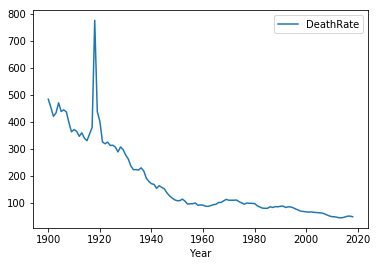

In [74]:
mortality_group.plot(x='Year', y='DeathRate')
# you can see outliers from the plot

In [75]:
mortality_group.query('DeathRate > 500')

,Year,AgeGroup,DeathRate
375,1918.0,15-19 Years,777.4


## How to fix outliers

In [76]:
mortality_group = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')

mortality_group = mortality_group.query('DeathRate <= 500')
mortality_group.head()

,Year,AgeGroup,DeathRate
32,1932.0,01-04 Years,461.9
33,1933.0,01-04 Years,472.6
35,1935.0,01-04 Years,440.9
36,1936.0,01-04 Years,439.8
37,1937.0,01-04 Years,418.7


In [78]:
# cap the outliers values at 450
mortality_group = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')

mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] = 450
mortality_group.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,450.0
1,NaN,01-04 Years,450.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,450.0
4,NaN,01-04 Years,NaN


In [80]:
# assign the mean of the column to the outliers
# and plot the results
mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] \
    = mortality_group.DeathRate.mean()
mortality_group.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,450.0
1,NaN,01-04 Years,450.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,450.0
4,NaN,01-04 Years,NaN


In [81]:
# what is the mean?
mortality_group.DeathRate.mean()

145.03961864406787

In [83]:
# how to use interpolation to smooth the outliers
mortality_group = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/mortality_missing_values.csv')

mortality_group.loc[mortality_group.Year.isin([1917,1918,1919,1920]),
                    'DeathRate'] = None
mortality_group = mortality_group.interpolate()
mortality_group.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.80
1,1901.0,01-04 Years,1695.00
2,1902.0,01-04 Years,1618.55
3,1903.0,01-04 Years,1542.10
4,1904.0,01-04 Years,1520.50
